In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from glob import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
res=ResNet152V2(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in res.layers:
    layer.trainable = False

x=keras.layers.Flatten()(res.output)
x = keras.layers.Dropout(0.5)(x)
ouput=keras.layers.Dense(100,activation='softmax')(x)

model=keras.Model(inputs=res.input,outputs=ouput)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/kaggle/input/sports-classification/train",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        "/kaggle/input/sports-classification/test",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [6]:
r=model.fit(train_generator, validation_data=test_generator, batch_size=32, epochs=10)

Epoch 1/10
422/422 [==============================] - 189s 419ms/step - loss: 8.8967 - accuracy: 0.6201 - val_loss: 3.8311 - val_accuracy: 0.8460
Epoch 2/10
422/422 [==============================] - 176s 417ms/step - loss: 5.1005 - accuracy: 0.8186 - val_loss: 4.5907 - val_accuracy: 0.8580
Epoch 3/10
422/422 [==============================] - 176s 417ms/step - loss: 3.9032 - accuracy: 0.8695 - val_loss: 4.2466 - val_accuracy: 0.9020
Epoch 4/10
422/422 [==============================] - 174s 412ms/step - loss: 3.4227 - accuracy: 0.8913 - val_loss: 4.6661 - val_accuracy: 0.8960
Epoch 5/10
422/422 [==============================] - 175s 415ms/step - loss: 2.7256 - accuracy: 0.9133 - val_loss: 5.8556 - val_accuracy: 0.8860
Epoch 6/10
422/422 [==============================] - 176s 416ms/step - loss: 2.8155 - accuracy: 0.9160 - val_loss: 5.1215 - val_accuracy: 0.8920
Epoch 7/10
422/422 [==============================] - 177s 419ms/step - loss: 2.6166 - accuracy: 0.9254 - val_loss: 6.0599 -

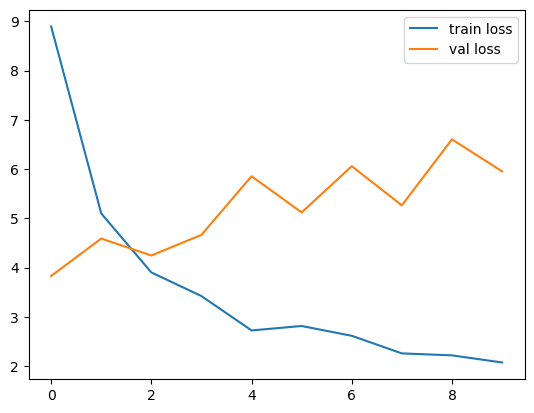

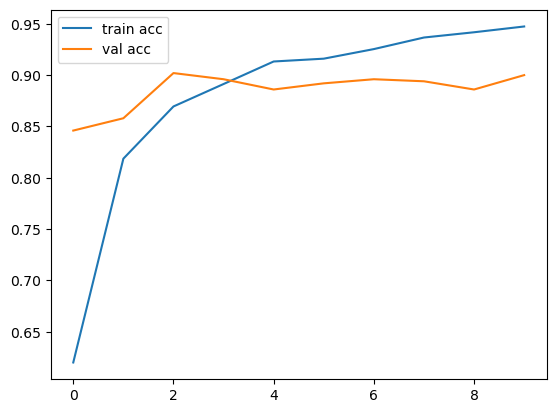

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [10]:
class_names=list(train_generator.class_indices.keys())
class_names

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [11]:
model.save('sportclass_model.h5')